 **Profit Prediction Using Multiple Linear Regression**

Import Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.pyplot import style
import warnings
warnings.filterwarnings(action="ignore")
import pickle

Import Dataset

In [2]:
data_df = pd.read_csv('1000_Companies.csv')

In [3]:
data_df.head()

,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94


In [4]:
data_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   R&D Spend        1000 non-null   float64
 1   Administration   1000 non-null   float64
 2   Marketing Spend  1000 non-null   float64
 3   State            1000 non-null   object 
 4   Profit           1000 non-null   float64
dtypes: float64(4), object(1)
memory usage: 39.2+ KB


In [5]:
data_df.describe()

,R&D Spend,Administration,Marketing Spend,Profit
count,1000.000000,1000.000000,1000.000000,1000.000000
mean,81668.927200,122963.897612,226205.058419,119546.164656
std,46537.567891,12613.927535,91578.393542,42888.633848
min,0.000000,51283.140000,0.000000,14681.400000
25%,43084.500000,116640.684850,150969.584600,85943.198543
50%,79936.000000,122421.612150,224517.887350,117641.466300
75%,124565.500000,129139.118000,308189.808525,155577.107425
max,165349.200000,321652.140000,471784.100000,476485.430000


In [6]:
data_df.isnull().sum()

R&D Spend          0
Administration     0
Marketing Spend    0
State              0
Profit             0
dtype: int64

Data Cleaning

In [7]:
data_df = data_df.dropna(axis=0)

In [8]:
continuous=list(data_df.columns)
continuous.remove("State")
continuous

['R&D Spend', 'Administration', 'Marketing Spend', 'Profit']

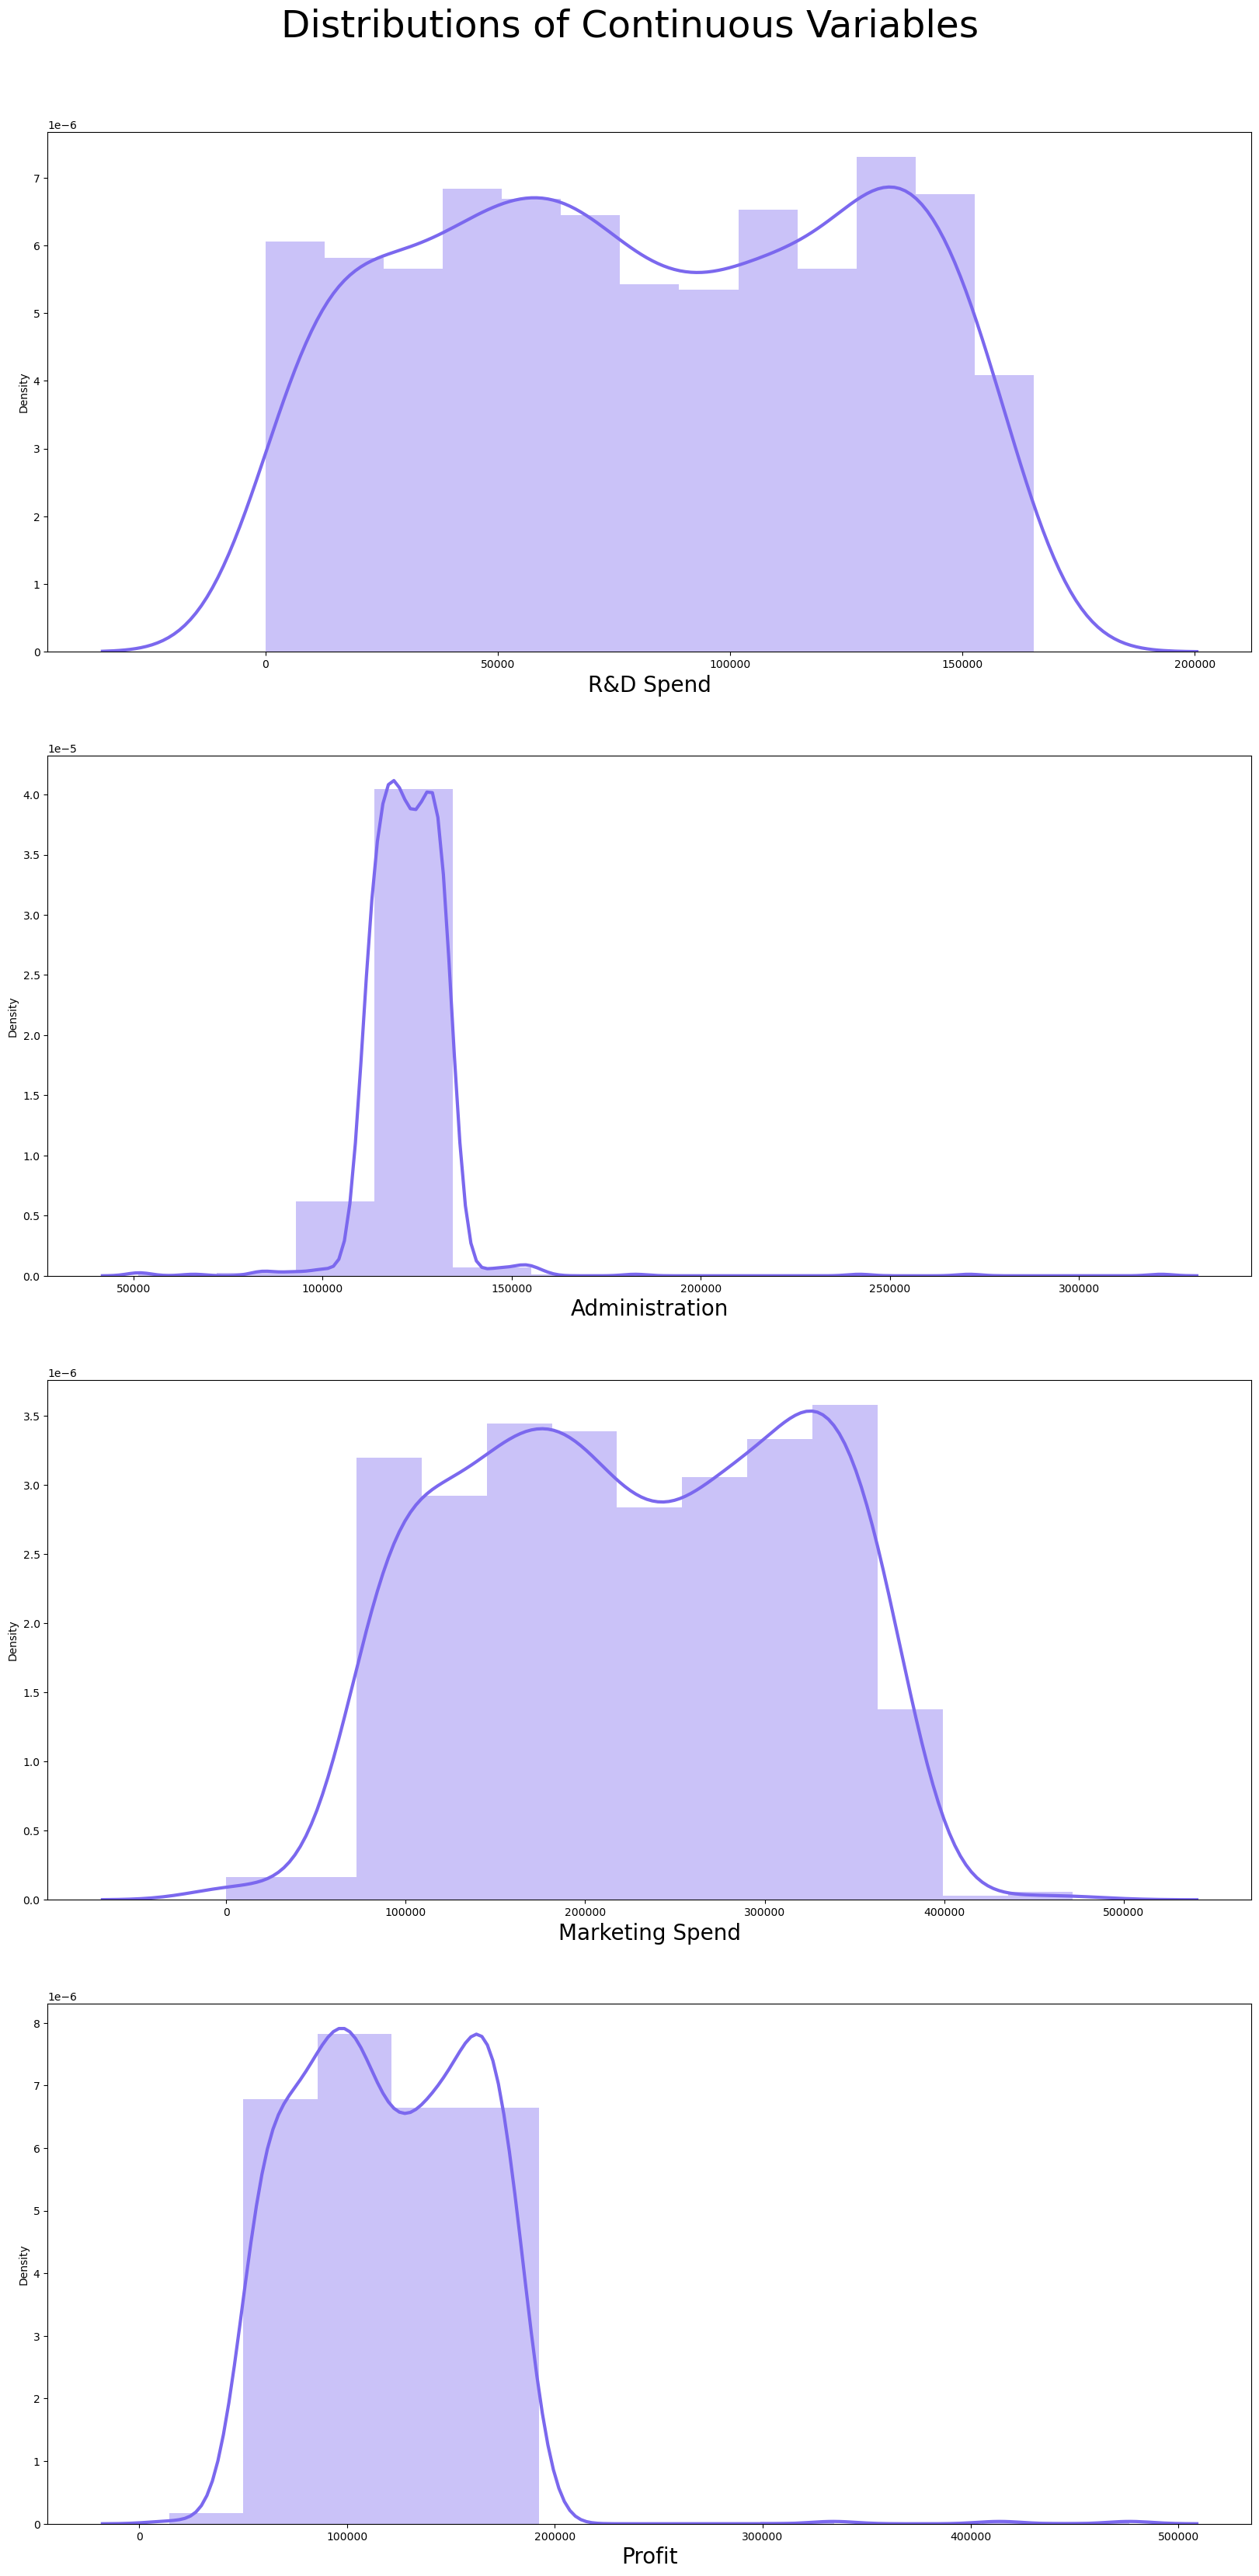

In [9]:
figure, axes = plt.subplots(nrows=4, ncols=1, figsize=(20,40))
for col in continuous:
    i = continuous.index(col)
    sns.distplot(data_df[col], ax=axes[i], bins=13, kde_kws={"lw":3}, color="mediumslateblue")
    axes[i].set_xlabel(axes[i].get_xlabel(), fontsize=20)
    axes[i].set_ylabel(axes[i].get_ylabel(), fontsize=10)
figure.suptitle("Distributions of Continuous Variables", fontsize=35, y=0.92)
plt.show()

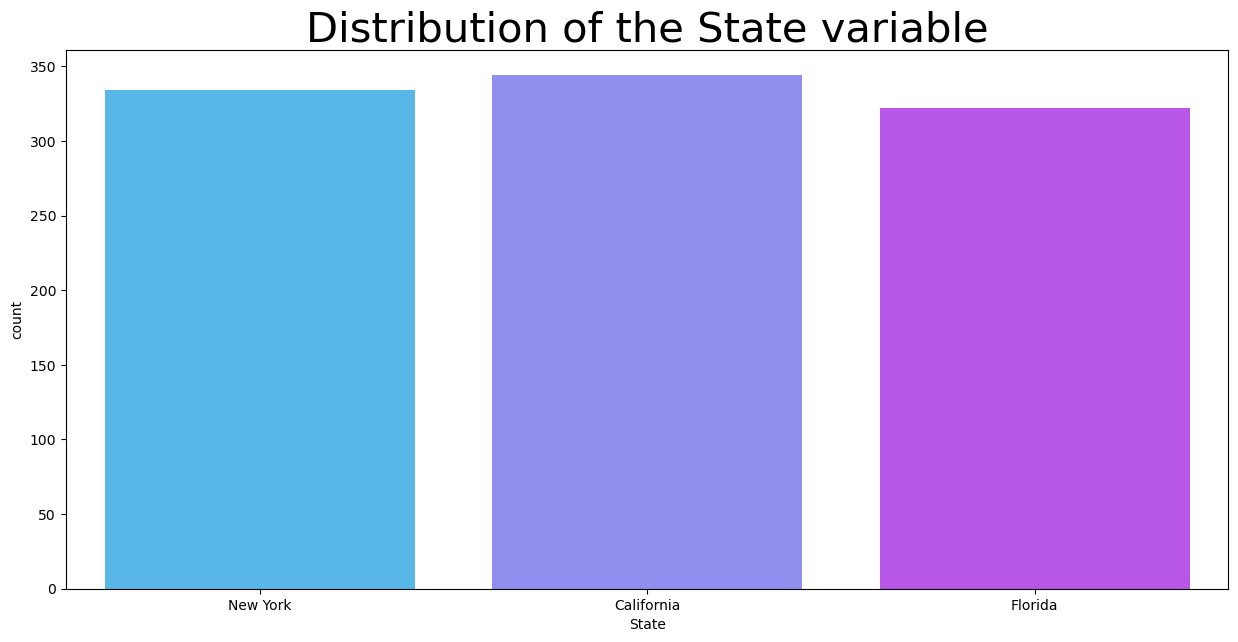

In [10]:
plt.figure(figsize=(15,7))
sns.countplot(data=data_df, x="State", palette="cool")
plt.title("Distribution of the State variable", fontsize=30)
plt.show()

Skewness of R&D Spend: -0.015613897044522113
Skewness of Administration: 6.003594592844964
Skewness of Marketing Spend: -0.04788919904256988
Skewness of Profit: 0.9597913396603033


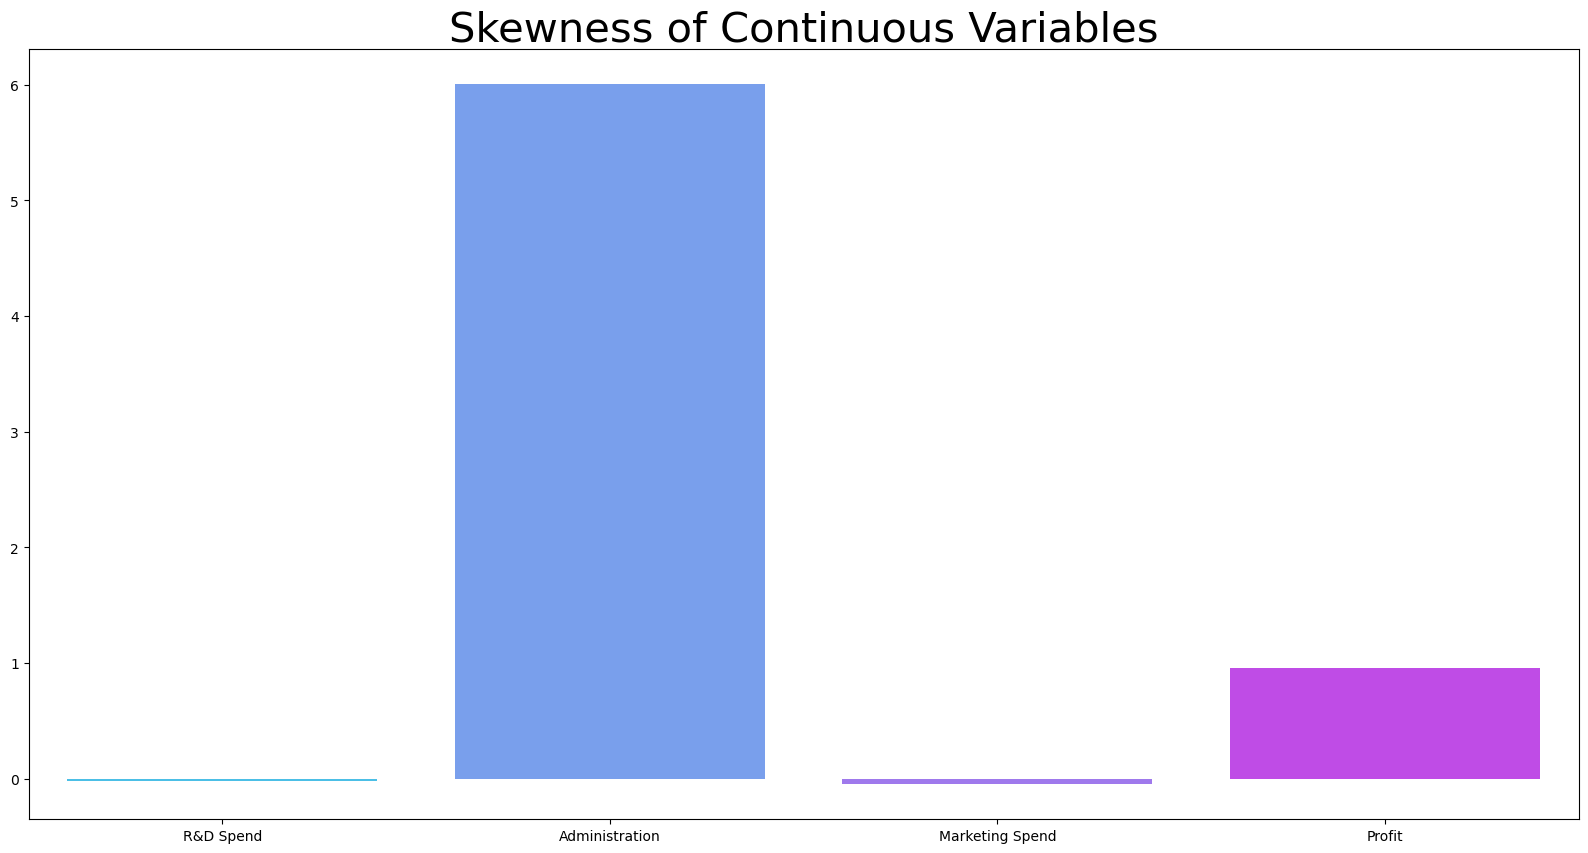

In [11]:
plt.figure(figsize=(20,10))
sk=dict()
for col in data_df.columns:
    if col!="State":
        skewness = data_df[col].skew()
        print(f"Skewness of {col}: {skewness}")
        sk[col]=skewness
sns.barplot(x=list(sk.keys()), y=list(sk.values()), palette="cool")
plt.title("Skewness of Continuous Variables", fontsize=30)
plt.show()

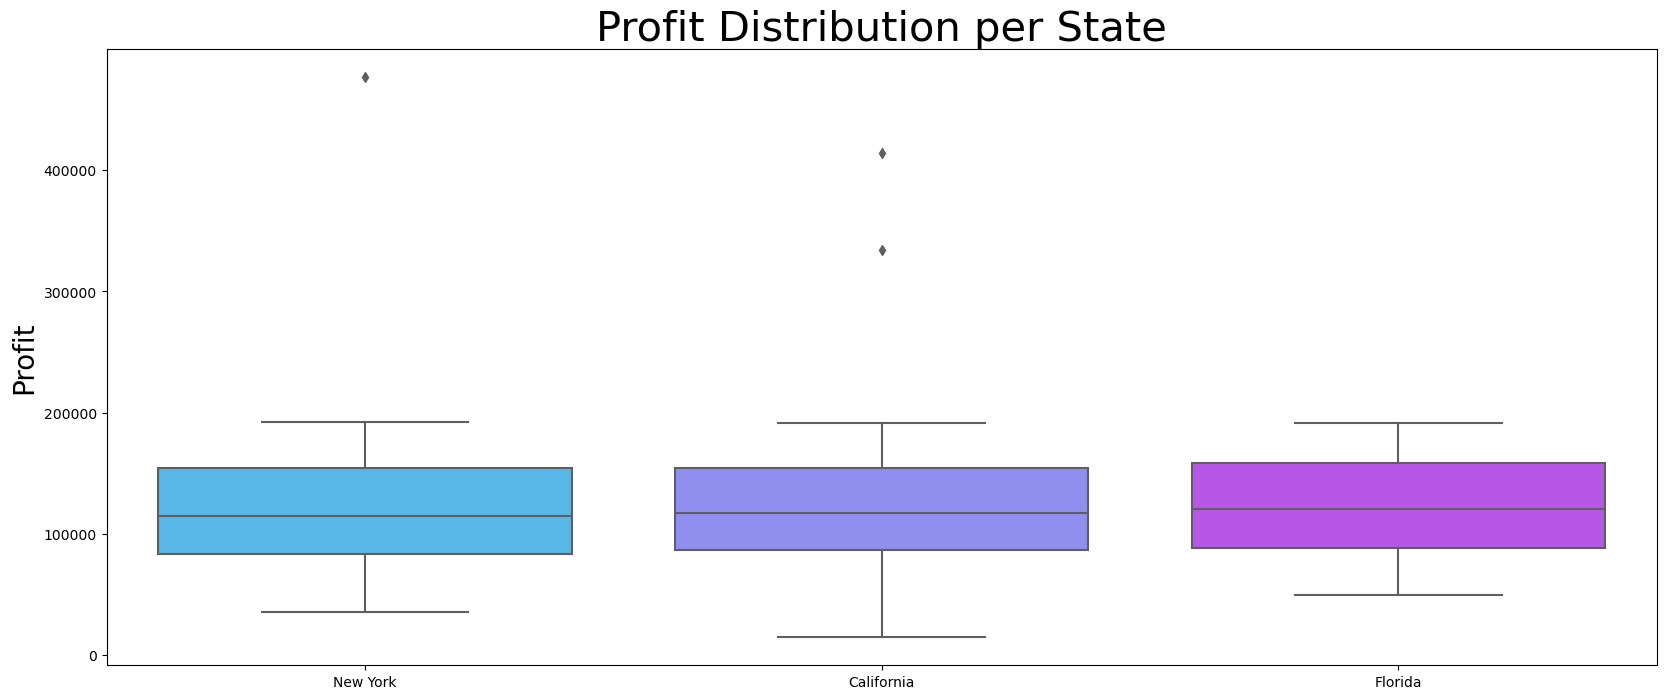

In [12]:
plt.figure(figsize=(20,8))
sns.boxplot(y="Profit", data=data_df, x="State", palette="cool")
plt.xlabel(None)
plt.ylabel("Profit",fontsize=20)
plt.title("Profit Distribution per State", fontsize=30)
plt.show()

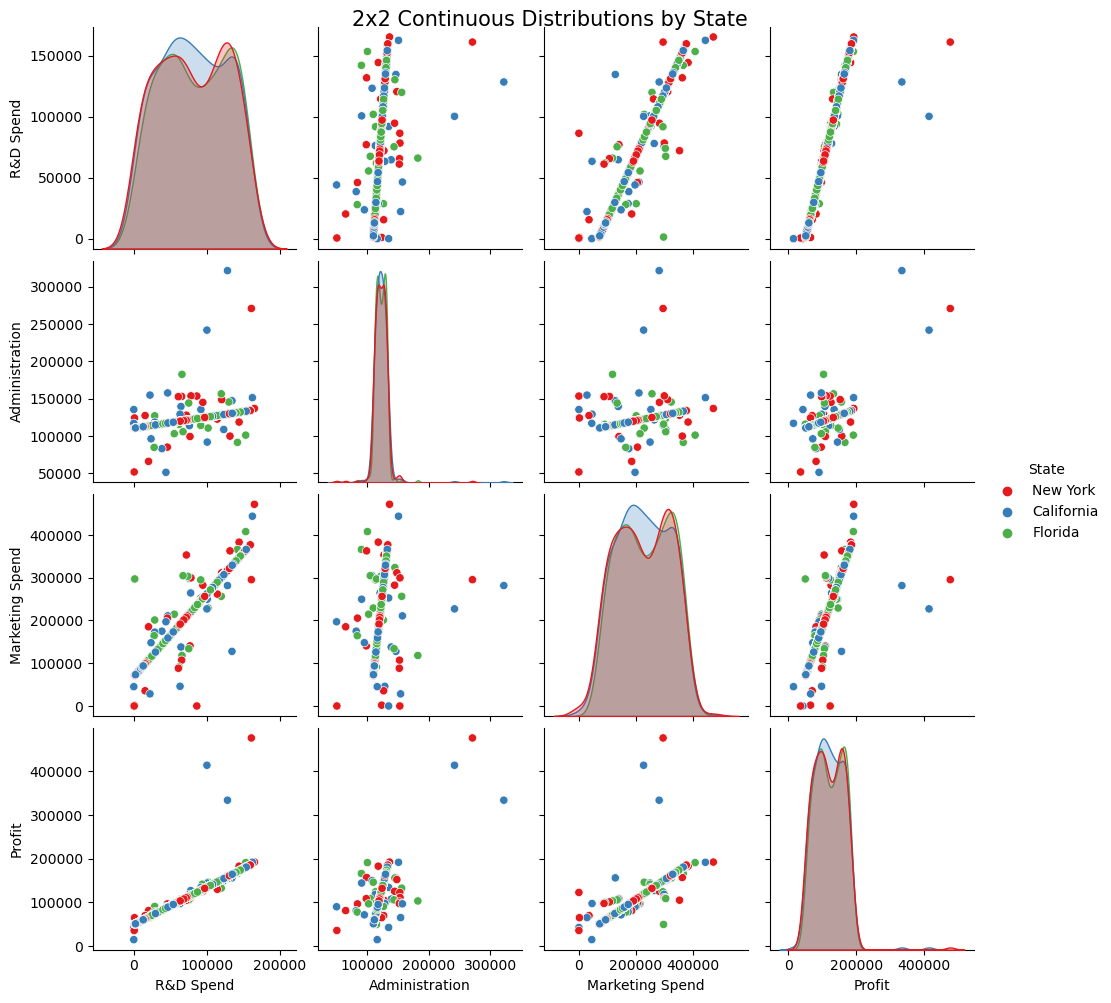

In [13]:
g=sns.pairplot(data_df, hue="State", palette="Set1", height=2.5)
g.fig.suptitle("2x2 Continuous Distributions by State\n", fontsize=15, y=1)
plt.show()

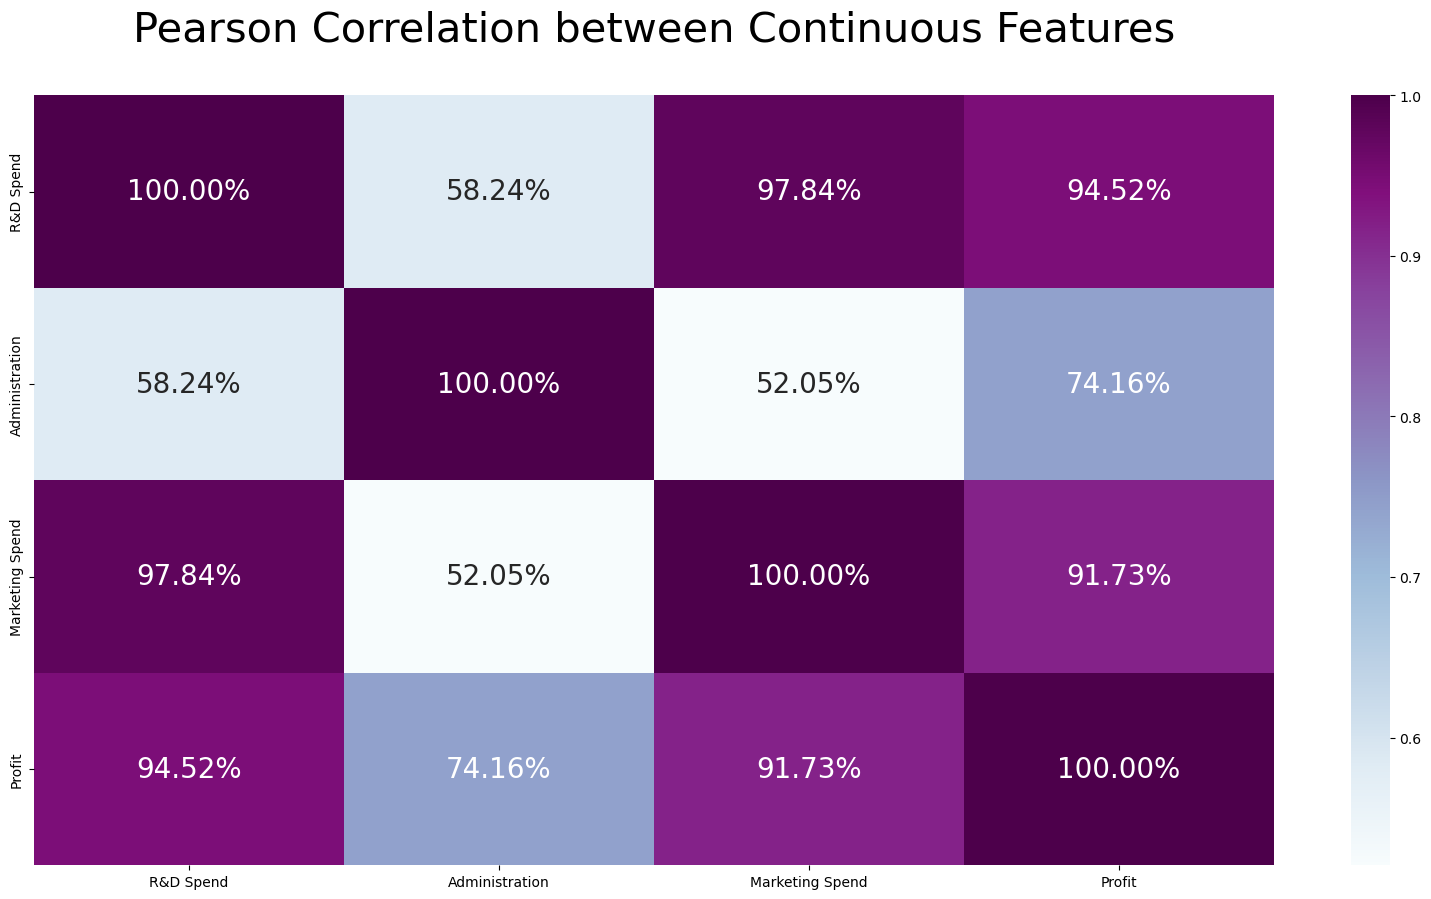

In [14]:
fig = plt.figure(figsize=(20,10))
corr = data_df.corr()
h = sns.heatmap(corr, annot=True, cmap="BuPu",annot_kws={'fontsize':20},fmt='.2%')
plt.title("Pearson Correlation between Continuous Features\n", fontsize=30)
plt.show()

Define x and y

In [15]:
x = data_df.drop(['State','Profit'], axis = 1).values
y = data_df['Profit'].values

Split the Dataset in training set and test set

In [16]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split( x, y, test_size=0.3, random_state=0)

Train the model on training set

In [17]:
from sklearn.linear_model import LinearRegression
ml = LinearRegression()
ml.fit(x_train,y_train)

LinearRegression()

Predict the test set results

In [18]:
y_pred = ml.predict(x_test)
print(y_pred)

[ 88956.51235675  87590.33288232  94070.44261188 175895.04692542
  83264.8145068  110477.49237073 131430.2598783   90642.52735311
 164607.08606112  53200.26939431  66071.93223218 150732.06810844
 126152.87519631  58444.88520795 176849.39498851  75153.71533755
 118351.29429923 163884.87669731 175400.90815642 182112.92585765
 124261.66808511  84827.88205071 181217.0423071   83300.06523457
 104201.14892595 100421.58636367  56176.51178313  56683.21021556
  68021.89761145 211034.28879633 120886.76507098 110933.17209544
 101375.93452471 138100.28197215  63085.94027719 108060.67022905
 186066.16240107 171648.62759104 174856.44098586 117773.52671411
  96610.21232336 164764.42456104 106924.90997596  50166.13018234
 116613.69288829  57738.15173913 158597.27225544  78567.87418509
 159911.00551765 131265.94577114 185112.67412592 174821.19035605
  92919.20647932  78184.41540355 180787.15575041  84499.44872788
 143051.71519558 170640.11384748  84220.02245579 105202.78456184
 141808.48328125  52320.7

In [19]:
ml.predict([[165349.20,136897.80,471784.10]])

array([201008.97589549])

Evaluate the Model

In [20]:
from sklearn.metrics import r2_score
r2_score(y_test,y_pred)

0.93128007811301

Plot the Results

Text(0.5, 1.0, 'Actual vs. Predicted')

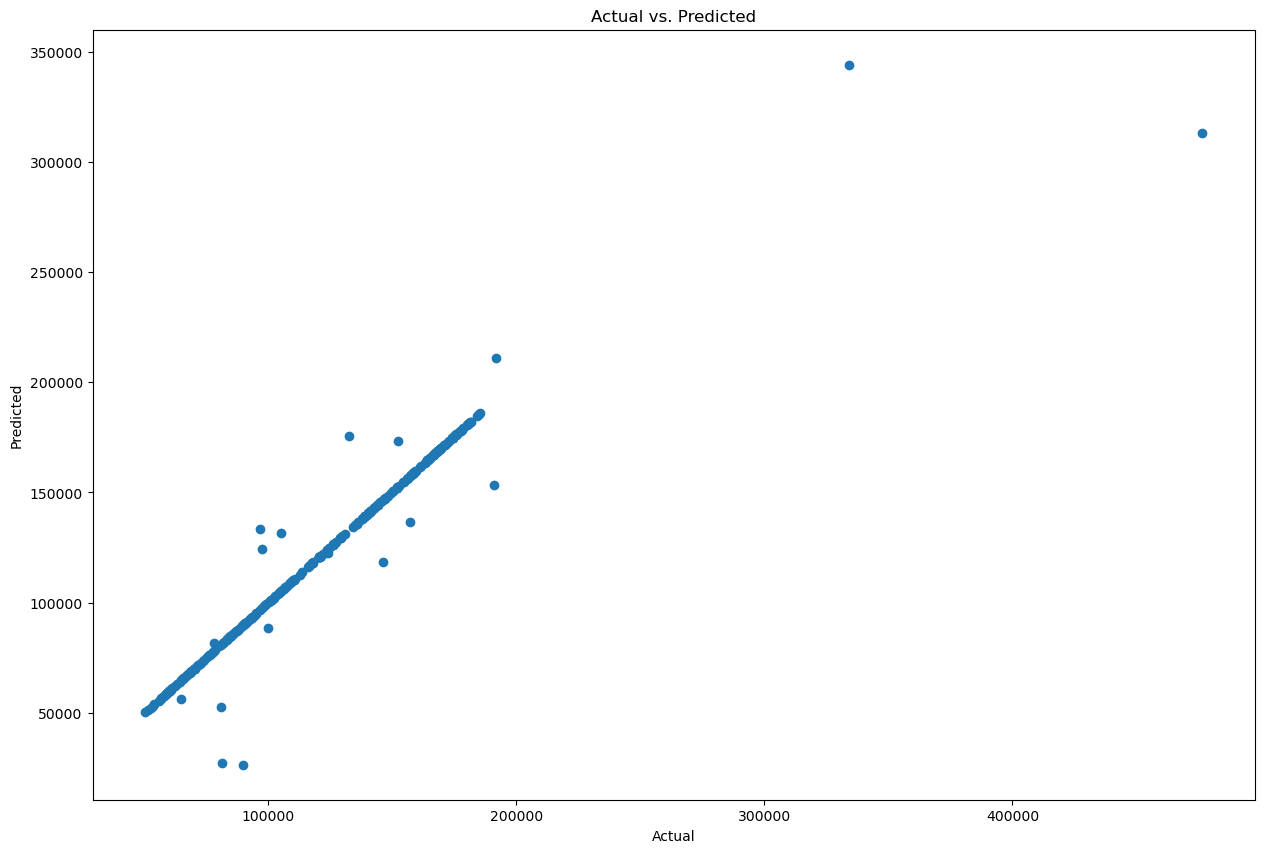

In [21]:
import matplotlib.pyplot as plt
plt.figure(figsize=(15,10))
plt.scatter(y_test,y_pred)
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title ('Actual vs. Predicted')


Predicted Values

In [22]:
pred_y_df = pd.DataFrame({'Actual value': y_test, 'Predicted value':y_pred,'Difference': y_test-y_pred })
pred_y_df[0:20]

,Actual value,Predicted value,Difference
0,89012.02672,88956.512357,55.514363
1,87654.55773,87590.332882,64.224848
2,94093.35179,94070.442612,22.909178
3,175396.26160,175895.046925,-498.785325
4,83356.61784,83264.814507,91.803333
5,110395.79400,110477.492371,-81.698371
6,105008.31000,131430.259878,-26421.949878
7,90687.29210,90642.527353,44.764747
8,164180.27020,164607.086061,-426.815861
9,53483.75718,53200.269394,283.487786


In [28]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Calculate the Mean Squared Error (MSE)
mse = mean_squared_error(y_test, y_pred)

In [29]:

# Calculate the Root Mean Squared Error (RMSE)
rmse = mean_squared_error(y_test, y_pred, squared=False)

In [30]:
# Calculate the Mean Absolute Error (MAE)
mae = mean_absolute_error(y_test, y_pred)

In [31]:
# Calculate the R-squared (R2)
r2 = r2_score(y_test, y_pred)

In [32]:
# Print the score report
print("Mean Squared Error (MSE):", mse)
print("Root Mean Squared Error (RMSE):", rmse)
print("Mean Absolute Error (MAE):", mae)
print("R-squared (R2):", r2)

Mean Squared Error (MSE): 142867206.3797002
Root Mean Squared Error (RMSE): 11952.707073282612
Mean Absolute Error (MAE): 2246.392148971773
R-squared (R2): 0.93128007811301


Mean Squared Error (MSE):  142867206.3797002


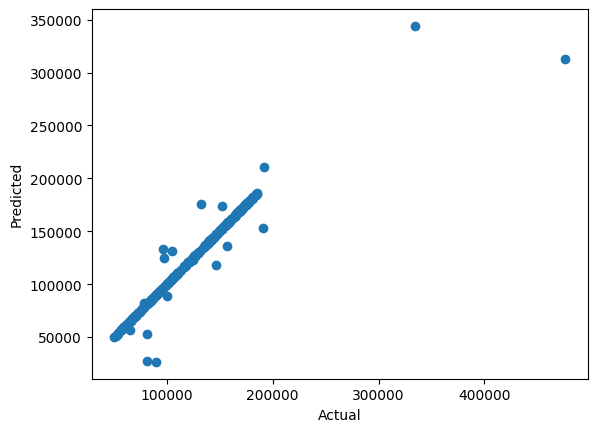

In [72]:
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

# Create a Linear Regression model
model = LinearRegression()

# Fit the model
model.fit(x_train, y_train)

# Predict the values
y_pred = model.predict(x_test)

# Calculate the Mean Squared Error
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error (MSE): ", mse)

# Plot actual vs predicted values
plt.scatter(y_test, y_pred)
plt.xlabel("Actual")
plt.ylabel("Predicted")
plt.show()


In [34]:
pickle.dump(ml, open("lin_model.pkl","wb"))   

In [ ]:
#model = pickle.load(open("lin_model", "rb"))

In [ ]:
#  wb is write mode     rb is read mode